<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/ENDS7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 TorchText

In [ ]:
!nvidia-smi

Thu Dec 10 15:22:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Random Swap
The random swap augmentation takes a sentence and then swaps words within it n times, with each iteration working on the previously swapped sentence. Here we sample two random numbers based on the length of the sentence, and then just keep swapping until we hit n.

In [ ]:
def random_swap(sentence, n=5): 
    length = range(len(sentence)) 
    for _ in range(n):
        idx1, idx2 = random.sample(length, 2)
        sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1] 
    return sentence

For more on this please go through this [paper](https://arxiv.org/pdf/1901.11196.pdf).

### Back Translation

Another popular approach for augmenting text datasets is back translation. This involves translating a sentence from our target language into one or more other languages and then translating all of them back to the original language. We can use the Python library googletrans for this purpose. 

In [ ]:
#!pip install googletrans==4.0.0-rc1
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 983kB 7.3MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 102kB 6.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp36-none-any.whl size=16369 sha256=9a5ffd9aeadf84a170a944267fd129c62f46c220d765cf6234a8b0ebf441e734
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=085cc3c54fe7336d20c47ea29745d3e64aa38fd9ff46c6c36e60479fd1bf3f65
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
import random
import googletrans
#import googletrans.Translator as Translator

translator = googletrans.Translator()
sentence = ['The dog slept on the rug', 'ran lazily']

available_langs = list(googletrans.LANGUAGES.keys()) 
trans_lang = random.choice(available_langs) 
print(f"Translating to {googletrans.LANGUAGES[trans_lang]}")

trans_lang

Translating to sundanese


'su'

In [ ]:
sentence = ['The dog slept on the rug']
available_langs = list(googletrans.LANGUAGES.keys()) 
trans_lang = random.choice(available_langs) 
print(f"Translating to {googletrans.LANGUAGES[trans_lang]}")

Translating to sundanese


In [ ]:
translations = translator.translate(sentence, dest=trans_lang) 
t_text = [t.text for t in translations]
print(t_text)

['Anjing bobo dina karpét']


In [ ]:
translations_en_random = translator.translate(t_text, src=trans_lang, dest='en') 
en_text = [t.text for t in translations_en_random]
print(en_text)

['The dog is lying on the carpet']


In [ ]:
translator = googletrans.Translator()

def back_translate(sentence):
    available_langs = list(googletrans.LANGUAGES.keys()) 
    trans_lang = random.choice(available_langs) 
    translations = translator.translate(sentence, dest=trans_lang) 
    t_text = [t.text for t in translations]
    translations_en_random = translator.translate(t_text, src=trans_lang, dest='en') 
    en_text = [t.text for t in translations_en_random]
    return en_text

In [ ]:
back_translate([my_new_df.iloc[0].sentence])

['s performance reaffirms her']

In [ ]:
empty_series = { col:[] for col in my_new_df.columns.values}
simpler_series_df = pd.DataFrame(data=empty_series)

In [ ]:
my_new_df["sentence_index"] = my_new_df["sentence_index"].astype('int')

In [ ]:
my_new_df["Phrase_Id"] = my_new_df["Phrase_Id"].astype('int')

In [ ]:
my_new_df =pd.read_csv("/content/StanJoinedRetrans.csv", sep="|")

In [ ]:
simpler_series_df,my_new_df["sentence_index"].max()

(Empty DataFrame
 Columns: [sentence_index, sentence, Phrase_Id, Sentiment_Score, label]
 Index: [], 56998)

In [ ]:
simpler_series_df["sentence_index"].max()

58998.0

In [ ]:
#simpler_series_df = my_new_df[:100]
max_sentence_ids=simpler_series_df["sentence_index"].max()
for idx in my_new_df[3000:5000].itertuples():
    #parts = line[:-1].split('\t')
    #label = parts[0]
    sentence = idx.sentence
    aug_sentence = back_translate([sentence])[0]
    #aug_sentences = eda(sentence, alpha_sr=alpha_sr, alpha_ri=alpha_ri, alpha_rs=alpha_rs, p_rd=alpha_rd, num_aug=num_aug)
    #print(back_translate(sentence))
    # for aug_sentence in aug_sentences:
    max_sentence_ids += 1
    simpler_series_df.loc[len(simpler_series_df)] = [max_sentence_ids,aug_sentence, np.int(idx.Phrase_Id), idx.Sentiment_Score, idx.label ]

In [ ]:
simpler_series_df.to_csv("StanGoogTranslate.csv", index=False, sep="|")

In [ ]:
#!pip install google_trans_new


In [ ]:
len(available_langs)

107

### Stanford Sentiment Analysis TreeBank


The original dataset includes:
1. original_rt_snippets.txt contains 10,605 processed snippets from the original pool of Rotten Tomatoes HTML files. Please note that some snippet may contain multiple sentences.

2. dictionary.txt contains all phrases and their IDs, separated by a vertical line |

3. sentiment_labels.txt contains all phrase ids and the corresponding sentiment labels, separated by a vertical line.
Note that you can recover the 5 classes by mapping the positivity probability using the following cut-offs:
[0, 0.2], (0.2, 0.4], (0.4, 0.6], (0.6, 0.8], (0.8, 1.0]
for very negative, negative, neutral, positive, very positive, respectively.
Please note that phrase ids and sentence ids are not the same.

4. SOStr.txt and STree.txt encode the structure of the parse trees. 
STree encodes the trees in a parent pointer format. Each line corresponds to each sentence in the datasetSentences.txt file. The Matlab code of this paper will show you how to read this format if you are not familiar with it.

5. datasetSentences.txt contains the sentence index, followed by the sentence string separated by a tab. These are the sentences of the train/dev/test sets.

6. datasetSplit.txt contains the sentence index (corresponding to the index in datasetSentences.txt file) followed by the set label separated by a comma:
	1 = train
	2 = test
	3 = dev

Please note that the datasetSentences.txt file has more sentences/lines than the original_rt_snippet.txt. 
Each row in the latter represents a snippet as shown on RT, whereas the former is each sub sentence as determined by the Stanford parser.






## Data Handling

For the purpose of this notebook, we do the following:
1. From datasentences.txt, we take each sentence and find the corresponding "Phrase_Id" in dictionary.txt
2. Using the "Phrase_Id" we retrieve the "sentiment values" from sentiment_labels.txt


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
datasetSentences_df = pd.read_csv("/content/datasetSentences.txt", sep="\t")
dictionary_df = pd.read_csv("/content/dictionary.txt", sep="|", names=["Phrase", "Phrase_Id"])
sentiment_labels_df =  pd.read_csv("/content/sentiment_labels.txt", sep="|")

In [ ]:
datasetSentences_df["Phrase_Id"] = 0
datasetSentences_df["Sentiment_Score"] = 0

In [ ]:
common_sentences = datasetSentences_df[datasetSentences_df["sentence"].isin(dictionary_df["Phrase"])]
common_sentences

,sentence_index,sentence,Phrase_Id
0,1,The Rock is destined to be the 21st Century 's...,224044
1,2,The gorgeously elaborate continuation of `` Th...,224044
2,3,Effective but too-tepid biopic,224044
3,4,If you sometimes like to go to the movies to h...,224044
4,5,"Emerges as something rare , an issue movie tha...",224044
...,...,...,...
11850,11851,A real snooze .,224044
11851,11852,No surprises .,224044
11852,11853,We 've seen the hippie-turned-yuppie plot befo...,224044
11853,11854,Her fans walked out muttering words like `` ho...,224044


### Create Dataframe to have sentiment scores and Full sentences together.

In [ ]:
def sentence_exists(input_sentence):
    #print(input_sentence)
    matching_phrase = dictionary_df[dictionary_df["Phrase"] == input_sentence]["Phrase_Id"].values
    default_series = pd.Series({"Phrase_Id":-1000, "Sentiment_Score": -1000}) ## For cases where we dont find a full sentence match
    if(len(matching_phrase)) > 0:
        phrase_id = np.int(matching_phrase[0])
        sentiment_value = sentiment_labels_df[sentiment_labels_df["phrase ids"] == matching_phrase[0]]["sentiment values"].values[0]
        default_series = pd.Series({"Phrase_Id":phrase_id, "Sentiment_Score": sentiment_value})

    return default_series


datasetSentences_df.loc[:, ["Phrase_Id", "Sentiment_Score"]] =  datasetSentences_df.loc[:,"sentence"].apply(sentence_exists)


In [ ]:
datasetSentences_df["Phrase_Id"] = datasetSentences_df["Phrase_Id"].astype('int')
datasetSentences_df = datasetSentences_df[datasetSentences_df["Phrase_Id"] > 0].iloc[:,:-1]
datasetSentences_df.to_csv("StanfordNLP.csv",index=False, sep="|")

In [ ]:
new_df = pd.read_csv("/content/StanfordNLP.csv",sep="|")

In [ ]:
new_df

,sentence_index,sentence,Phrase_Id,Sentiment_Score
0,1,The Rock is destined to be the 21st Century 's...,226166,0.69444
1,2,The gorgeously elaborate continuation of `` Th...,226300,0.83333
2,3,Effective but too-tepid biopic,13995,0.51389
3,4,If you sometimes like to go to the movies to h...,14123,0.73611
4,5,"Emerges as something rare , an issue movie tha...",13999,0.86111
...,...,...,...,...
11281,11851,A real snooze .,222071,0.11111
11282,11852,No surprises .,225165,0.22222
11283,11853,We 've seen the hippie-turned-yuppie plot befo...,226985,0.75000
11284,11854,Her fans walked out muttering words like `` ho...,223632,0.13889


## Training and test dataset
After applying above techiniques we get a combined DataFrame that has the following fields:

1. **sentence_index** : Original sentence_index in the datasetSentences.txt
2. **sentence**: The actual sentence
3. **Phrase_Id**: The Phrase_Id used for mapping/retrieving sentiment score
4. **Sentiment_Score**: Actual Sentiment score for the sentence

Now we split the DataFrame into Training and Test Dataframes. Note that we are not using the recommended train/ dev /test splits from the dataset. 




In [ ]:
train_df = new_df.sample(frac = 0.8) 
test_df = new_df[~new_df.sentence_index.isin(train_df.sentence_index)]

In [ ]:
train_df.to_csv("StanTrain.csv",index=False, sep="|")
test_df.to_csv("StanTest.csv", index=False, sep="|")

## Data Augementation
We use the EDA techniques referred in this [code](https://github.com/jasonwei20/eda_nlp)
Our parameters for Augmentation are as follows:
1. Num_aug = 5 i.e 5 augmented sentences
2. alpha_rs=0.2 i.e 20% percent of words in each sentence to be swapped
3. alpha_rd=0.2 i.e 20% percent of words in each sentence to be dropped

In [ ]:
from eda import *

simpler_series_df = train_df.copy()
empty_series = { col:[] for col in train_df.columns.values}
my_new_df = pd.DataFrame(data=empty_series)

In [ ]:
simpler_series_df = train_df#simpler_series_df[:100]

In [ ]:
max_sentence_ids = simpler_series_df.sentence_index.max()
alpha_sr = 0.0
alpha_ri=0.0
alpha_rs=0.2
alpha_rd=0.2
num_aug=5

for idx in simpler_series_df.itertuples():
    #parts = line[:-1].split('\t')
    #label = parts[0]
    sentence = idx.sentence
    aug_sentences = eda(sentence, alpha_sr=alpha_sr, alpha_ri=alpha_ri, alpha_rs=alpha_rs, p_rd=alpha_rd, num_aug=num_aug)
    for aug_sentence in aug_sentences:
        max_sentence_ids += 1
        my_new_df.loc[len(my_new_df)] = [max_sentence_ids,aug_sentence, np.int(idx.Phrase_Id), idx.Sentiment_Score ]

In [ ]:
my_new_df

,sentence_index,sentence,Phrase_Id,Sentiment_Score
0,11855.0,and amazing is excessively strained contrived,151215.0,0.44444
1,11856.0,amazing and neither unhappily is lovely excess...,151215.0,0.44444
2,11857.0,neither and amazing contrived is lovely excess...,151215.0,0.44444
3,11858.0,lovely and unhappily is neither strained and c...,151215.0,0.44444
4,11859.0,lovely and amazing unhappily is neither excess...,151215.0,0.44444
...,...,...,...,...
45140,56995.0,not absolutely mention to refreshed,225210.0,0.80556
45141,56996.0,absolutely to mention not refreshed,225210.0,0.80556
45142,56997.0,not mention absolutely refreshed,225210.0,0.80556
45143,56998.0,not mention absolutely refreshed,225210.0,0.80556


In [ ]:
my_new_df = my_new_df.sample(frac = 1) 

In [ ]:
my_new_df.to_csv("StanAugmented.csv", index=False, sep="|")

In [ ]:
my_new_df = my_new_df.append(train_df,ignore_index=True)

,sentence_index,sentence,Phrase_Id,Sentiment_Score
0,34766.0,s performance confirms her once again,44733.0,0.88889
1,18024.0,what s the russian word for wow,227385.0,0.77778
2,23140.0,verve s stylishly directed with it,66669.0,0.75000
3,50084.0,without shakespeare s eloquent language the up...,111221.0,0.15278
4,28678.0,a de of cinema,103960.0,0.63889
...,...,...,...,...
54169,3075.0,This fascinating experiment plays as more of a...,70193.0,0.66667
54170,2645.0,Remove Spider-Man the movie from its red herri...,68393.0,0.66667
54171,1940.0,High Crimes knows the mistakes that bad movies...,45489.0,0.58333
54172,2642.0,The Bourne Identity should n't be half as ente...,69263.0,0.77778


## Augmenting with Back_Translate

In this method we make a translate from source English sentence to a sentence in random language and then back into English. We create a dataframe of around 4000 samples and append it back to the dataset

In [ ]:
#!pip install googletrans==4.0.0-rc1
!pip install googletrans==3.1.0a0

In [ ]:
translator = googletrans.Translator()

def back_translate(sentence):
    available_langs = list(googletrans.LANGUAGES.keys()) 
    trans_lang = random.choice(available_langs) 
    translations = translator.translate(sentence, dest=trans_lang) 
    t_text = [t.text for t in translations]
    translations_en_random = translator.translate(t_text, src=trans_lang, dest='en') 
    en_text = [t.text for t in translations_en_random]
    return en_text

In [ ]:
#simpler_series_df = my_new_df[:100]
max_sentence_ids=simpler_series_df["sentence_index"].max()
for idx in my_new_df[3000:5000].itertuples():
    #parts = line[:-1].split('\t')
    #label = parts[0]
    sentence = idx.sentence
    aug_sentence = back_translate([sentence])[0]
    #aug_sentences = eda(sentence, alpha_sr=alpha_sr, alpha_ri=alpha_ri, alpha_rs=alpha_rs, p_rd=alpha_rd, num_aug=num_aug)
    #print(back_translate(sentence))
    # for aug_sentence in aug_sentences:
    max_sentence_ids += 1
    simpler_series_df.loc[len(simpler_series_df)] = [max_sentence_ids,aug_sentence, np.int(idx.Phrase_Id), idx.Sentiment_Score, idx.label ]

In [ ]:
simpler_series_df.to_csv("StanGoogTranslate.csv", index=False, sep="|")

In [ ]:
my_new_df = my_new_df.append(train_df,ignore_index=True)

### Range expansion
The sentiment scores are floats between [0,1] so we convert this to equivalent integers between 0 and 24(i.e 25 different classes)

In [ ]:
my_new_df["label"] = 0
# def quantize_predictions(score_val):
#     if(score_val >=0 and score_val <=0.2):
#         return 0
#     if(score_val > 0.2 and score_val <=0.4):
#         return 1
#     if(score_val > 0.4 and score_val <=0.6):
#         return 2
#     if(score_val > 0.6 and score_val <=0.8):
#         return 3
#     if(score_val > 0.8 and score_val <=1):
#         return 4
def quantize_predictions(score_val):
    return np.floor(score_val * 24)


my_new_df.loc[:,"label"] = my_new_df.loc[:,"Sentiment_Score"].apply(quantize_predictions)

In [ ]:
my_new_df["sentence_index"] = my_new_df["sentence_index"].astype('int')
my_new_df["Phrase_Id"] = my_new_df["Phrase_Id"].astype('int')
my_new_df["label"] = my_new_df["label"].astype('int')

In [ ]:
my_new_df#.Sentiment_Score.sort_values(ascending=True).values

,sentence_index,sentence,Phrase_Id,Sentiment_Score,label
0,34766,s performance confirms her once again,44733,0.88889,21
1,18024,what s the russian word for wow,227385,0.77778,18
2,23140,verve s stylishly directed with it,66669,0.75000,18
3,50084,without shakespeare s eloquent language the up...,111221,0.15278,3
4,28678,a de of cinema,103960,0.63889,15
...,...,...,...,...,...
58169,3075,This fascinating experiment plays as more of a...,70193,0.66667,16
58170,2645,Remove Spider-Man the movie from its red herri...,68393,0.66667,16
58171,1940,High Crimes knows the mistakes that bad movies...,45489,0.58333,13
58172,2642,The Bourne Identity should n't be half as ente...,69263,0.77778,18


## Training on Sentiment Tree Bank

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import random
import torch, torchtext
from torchtext import data 
import matplotlib.pyplot as plt


# Manual Seed
SEED = 43
torch.manual_seed(SEED)

In [ ]:
my_new_df = pd.read_csv("/content/StanFullTrain.csv", sep="|")

(array([ 349., 1241., 1119., 1704., 3842., 2341., 3840., 4484., 1782.,
        2714., 3121., 1126., 2571., 2685., 1617., 2337., 4409., 2528.,
        4015., 4882., 1575., 2322., 1190.,  209.,  171.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

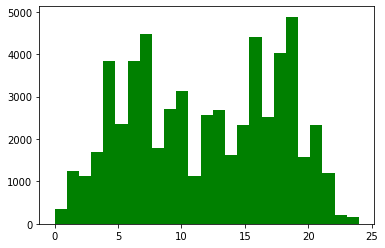

In [ ]:
my_new_df.Sentiment_Score
num_bins = 25
   
# n, bins, patches = plt.hist( my_new_df.Sentiment_Score.sort_values(ascending=True).values,num_bins,
#                             density = 1,  
#                             color ='green', 
#                             alpha = 0.7) 
colors = ['green']#, 'blue', 'lime'] 
plt.hist(my_new_df.label, density=False, bins=25,histtype ='bar',color = colors, 
         label = colors)
#plt.hist(my_new_df.Sentiment_Score, density=False, bins=25,histtype ='bar')

In [ ]:
my_new_df.label.min(),my_new_df.label.max()

(0, 24)

In [ ]:
len(my_new_df.label.unique())

25

In [ ]:
Sentence = data.Field(sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True)
Label = data.LabelField(tokenize ='spacy', is_target=True, batch_first =True, sequential =False)

In [ ]:
fields = [('sentence', Sentence),('label',Label)]

In [ ]:
#example = [data.Example.fromlist([df.tweets[i],df.labels[i]], fields) for i in range(df.shape[0])] 


example = [data.Example.fromlist([my_new_df.sentence[i],my_new_df.label[i]], fields) for i in range(my_new_df.shape[0])] 
# Creating dataset
#twitterDataset = data.TabularDataset(path="tweets.csv", format="CSV", fields=fields, skip_header=True)

stanTreeDataset = data.Dataset(example, fields)
(train, valid) = stanTreeDataset.split(split_ratio=[0.85, 0.15], random_state=random.seed(SEED))
Sentence.build_vocab(train)
Label.build_vocab(train)

In [ ]:
my_new_df.label.max()

25

In [ ]:
(len(train), len(valid))

(49448, 8726)

In [ ]:
print('Size of input vocab : ', len(Sentence.vocab))
print('Size of label vocab : ', len(Label.vocab))
print('Top 10 words appreared repeatedly :', list(Sentence.vocab.freqs.most_common(10)))
print('Labels : ', Label.vocab.stoi)

Size of input vocab :  19829
Size of label vocab :  25
Top 10 words appreared repeatedly : [('the', 38365), ('a', 27657), ('and', 23762), ('of', 23635), ('to', 16449), ('is', 13853), ('it', 12608), ('s', 11477), ('in', 10427), ('that', 10222)]
Labels :  defaultdict(<function _default_unk_index at 0x7fa8567d41e0>, {19: 0, 7: 1, 16: 2, 18: 3, 6: 4, 4: 5, 10: 6, 9: 7, 13: 8, 12: 9, 17: 10, 15: 11, 5: 12, 21: 13, 8: 14, 3: 15, 14: 16, 20: 17, 1: 18, 22: 19, 11: 20, 2: 21, 0: 22, 23: 23, 24: 24})


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_iterator, valid_iterator = data.BucketIterator.splits((train, valid), batch_size = 32, 
                                                            sort_key = lambda x: len(x.sentence),
                                                            sort_within_batch=True, device = device)

In [ ]:
next(iter(train_iterator))


[torchtext.data.batch.Batch of size 32]
	[.sentence]:('[torch.cuda.LongTensor of size 32x16 (GPU 0)]', '[torch.cuda.LongTensor of size 32 (GPU 0)]')
	[.label]:[torch.cuda.LongTensor of size 32 (GPU 0)]

In [ ]:
import os, pickle
with open('tokenizer.pkl', 'wb') as tokens: 
    pickle.dump(Sentence.vocab.stoi, tokens)

## Defining Our Model

We use the Embedding and LSTM modules in PyTorch to build a simple model for classifying tweets.

In this model we create three layers. 
1. First, the words in our tweets are pushed into an Embedding layer, which we have established as a 300-dimensional vector embedding. 
2. That’s then fed into a 2 stacked-LSTMs with 100 hidden features (again, we’re compressing down from the 300-dimensional input like we did with images). We are using 2 LSTMs for using the dropout.
3. Finally, the output of the LSTM (the final hidden state after processing the incoming tweet) is pushed through a standard fully connected layer with three outputs to correspond to our three possible classes (negative, positive, or neutral).

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # LSTM layer
        self.encoder = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           batch_first=True)
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, (hidden, cell) = self.encoder(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
    
        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)   
        
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
            
        return output

In [ ]:
# Define hyperparameters
size_of_vocab = len(Sentence.vocab)
embedding_dim = 300
num_hidden_nodes = 100
num_output_nodes = len(my_new_df.label.unique())
num_layers = 2
dropout = 0.2

# Instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout = dropout)


In [ ]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

classifier(
  (embedding): Embedding(15552, 300)
  (encoder): LSTM(300, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=25, bias=True)
)
The model has 4,909,725 trainable parameters


In [ ]:
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=2e-4)
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

## Model Training and Evaluation

First define the optimizer and loss functions

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    
    for batch in iterator:
        
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        sentence, sentence_lengths = batch.sentence
        
        # convert to 1D tensor
        predictions = model(sentence, sentence_lengths).squeeze()  
        #print(predictions)
        # compute the loss
        loss = criterion(predictions, batch.label)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.label)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()      
        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            sentence, sentence_lengths = batch.sentence
            
            # convert to 1d tensor
            predictions = model(sentence, sentence_lengths).squeeze()
            #print(predictions)
            
            # compute loss and accuracy
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            
            # keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
N_EPOCHS = 100
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    #train_loss = train(model, train_iterator, optimizer, criterion)


    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    #valid_loss = evaluate(model, valid_iterator, criterion)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    print(f'\tEpoch: {epoch} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

	Epoch: 0 | Train Loss: 3.179 | Train Acc: 10.40%
	 Val. Loss: 3.151 |  Val. Acc: 13.91% 

	Epoch: 1 | Train Loss: 3.107 | Train Acc: 18.68%
	 Val. Loss: 3.091 |  Val. Acc: 20.56% 

	Epoch: 2 | Train Loss: 3.038 | Train Acc: 26.47%
	 Val. Loss: 3.027 |  Val. Acc: 27.81% 

	Epoch: 3 | Train Loss: 2.972 | Train Acc: 33.28%
	 Val. Loss: 2.983 |  Val. Acc: 32.03% 

	Epoch: 4 | Train Loss: 2.926 | Train Acc: 37.35%
	 Val. Loss: 2.955 |  Val. Acc: 34.29% 

	Epoch: 5 | Train Loss: 2.897 | Train Acc: 39.86%
	 Val. Loss: 2.929 |  Val. Acc: 36.66% 

	Epoch: 6 | Train Loss: 2.876 | Train Acc: 41.70%
	 Val. Loss: 2.909 |  Val. Acc: 38.50% 

	Epoch: 7 | Train Loss: 2.855 | Train Acc: 44.05%
	 Val. Loss: 2.891 |  Val. Acc: 40.78% 

	Epoch: 8 | Train Loss: 2.828 | Train Acc: 46.98%
	 Val. Loss: 2.867 |  Val. Acc: 43.41% 

	Epoch: 9 | Train Loss: 2.804 | Train Acc: 49.28%
	 Val. Loss: 2.854 |  Val. Acc: 44.51% 

	Epoch: 10 | Train Loss: 2.785 | Train Acc: 50.96%
	 Val. Loss: 2.847 |  Val. Acc: 45.12% 

In [ ]:
N_EPOCHS = 100
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    #train_loss = train(model, train_iterator, optimizer, criterion)


    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    #valid_loss = evaluate(model, valid_iterator, criterion)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    print(f'\tEpoch: {epoch} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

	Epoch: 0 | Train Loss: 2.319 | Train Acc: 96.61%
	 Val. Loss: 2.406 |  Val. Acc: 88.51% 

	Epoch: 1 | Train Loss: 2.318 | Train Acc: 96.64%
	 Val. Loss: 2.407 |  Val. Acc: 88.38% 

	Epoch: 2 | Train Loss: 2.318 | Train Acc: 96.66%
	 Val. Loss: 2.410 |  Val. Acc: 88.05% 

	Epoch: 3 | Train Loss: 2.318 | Train Acc: 96.70%
	 Val. Loss: 2.411 |  Val. Acc: 87.94% 

	Epoch: 4 | Train Loss: 2.318 | Train Acc: 96.72%
	 Val. Loss: 2.411 |  Val. Acc: 87.99% 

	Epoch: 5 | Train Loss: 2.317 | Train Acc: 96.75%
	 Val. Loss: 2.407 |  Val. Acc: 88.26% 

	Epoch: 6 | Train Loss: 2.317 | Train Acc: 96.77%
	 Val. Loss: 2.407 |  Val. Acc: 88.40% 

	Epoch: 7 | Train Loss: 2.317 | Train Acc: 96.80%
	 Val. Loss: 2.408 |  Val. Acc: 88.25% 

	Epoch: 8 | Train Loss: 2.317 | Train Acc: 96.84%
	 Val. Loss: 2.406 |  Val. Acc: 88.28% 

	Epoch: 9 | Train Loss: 2.316 | Train Acc: 96.85%
	 Val. Loss: 2.404 |  Val. Acc: 88.46% 

	Epoch: 10 | Train Loss: 2.316 | Train Acc: 96.88%
	 Val. Loss: 2.401 |  Val. Acc: 89.01% 

In [ ]:
N_EPOCHS = 100
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    #train_loss = train(model, train_iterator, optimizer, criterion)


    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    #valid_loss = evaluate(model, valid_iterator, criterion)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    print(f'\tEpoch: {epoch} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

	Epoch: 0 | Train Loss: 2.300 | Train Acc: 98.48%
	 Val. Loss: 2.384 |  Val. Acc: 90.43% 

	Epoch: 1 | Train Loss: 2.300 | Train Acc: 98.50%
	 Val. Loss: 2.384 |  Val. Acc: 90.35% 

	Epoch: 2 | Train Loss: 2.300 | Train Acc: 98.52%
	 Val. Loss: 2.379 |  Val. Acc: 90.97% 

	Epoch: 3 | Train Loss: 2.300 | Train Acc: 98.52%
	 Val. Loss: 2.384 |  Val. Acc: 90.48% 

	Epoch: 4 | Train Loss: 2.300 | Train Acc: 98.52%
	 Val. Loss: 2.383 |  Val. Acc: 90.54% 

	Epoch: 5 | Train Loss: 2.300 | Train Acc: 98.53%
	 Val. Loss: 2.381 |  Val. Acc: 90.84% 

	Epoch: 6 | Train Loss: 2.300 | Train Acc: 98.55%
	 Val. Loss: 2.379 |  Val. Acc: 90.84% 

	Epoch: 7 | Train Loss: 2.300 | Train Acc: 98.55%
	 Val. Loss: 2.379 |  Val. Acc: 90.94% 

	Epoch: 8 | Train Loss: 2.299 | Train Acc: 98.56%
	 Val. Loss: 2.379 |  Val. Acc: 90.94% 

	Epoch: 9 | Train Loss: 2.299 | Train Acc: 98.56%
	 Val. Loss: 2.378 |  Val. Acc: 91.03% 

	Epoch: 10 | Train Loss: 2.299 | Train Acc: 98.57%
	 Val. Loss: 2.378 |  Val. Acc: 91.00% 

In [ ]:
#load weights and tokenizer

path='./saved_weights.pt'
model.load_state_dict(torch.load(path));
model.eval();
tokenizer_file = open('./tokenizer.pkl', 'rb')
tokenizer = pickle.load(tokenizer_file)

#inference 

import spacy
nlp = spacy.load('en')

def classify_tweet(tweet):
    
    #categories = {0: "Negative", 1:"Positive", 2:"Neutral"}
    
    # tokenize the tweet 
    tokenized = [tok.text for tok in nlp.tokenizer(tweet)] 
    # convert to integer sequence using predefined tokenizer dictionary
    indexed = [tokenizer[t] for t in tokenized]        
    # compute no. of words        
    length = [len(indexed)]
    # convert to tensor                                    
    tensor = torch.LongTensor(indexed).to(device)   
    # reshape in form of batch, no. of words           
    tensor = tensor.unsqueeze(1).T  
    # convert to tensor                          
    length_tensor = torch.LongTensor(length)
    # Get the model prediction                  
    prediction = model(tensor, length_tensor)

    _, pred = torch.max(prediction, 1) 
    
    #return categories[pred.item()]
    return pred.item()

In [ ]:
classify_tweet("A valid explanation for why Trump won't let women on the golf course.")

6

In [ ]:
classify_tweet("The movie had zilch character, nada screenplay, zero action scenes, almost negligible thougts")

4

In [ ]:
classify_tweet("5 minutes into the movie, you feel you want to runaway but eventually the movie catches on and does a great job")

18